# __Techniki algorytmiczne projekt lato 2023/24__


## __Zadanie:__

Zbadać doświadczalnie złożoność obliczeniową
algorytmu sortowania Shella przy różnych ciągach przyrostów.

Należy sprawdzić ciągi dające rezultaty: O(n2),  O(n4/3), O(n3/2).
Dodatkowo należy przeprowadzić doświadczenia dla 3
własnych ciągów.

Badanie przeprowadzić dla tablic losowych elementów o
rozmiarach od 10000 do 500000 z krokiem 10000.


materiały dodatkowe:


*   https://www.interviewkickstart.com/learn/shell-sort
*   https://en.wikipedia.org/wiki/Shellsort
*   https://pl.wikipedia.org/wiki/Sortowanie_Shella

<u>**Uwaga:** AI chaty popełniają bardzo duże błędy, trzeba weryfikować wielokrotnie, mimo to nadal bywają przydatne</u>

*   https://chat.openai.com/
*   https://gemini.google.com/app





In [47]:
# Import'y
import time
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# Implementacja ciągów liczbowych

In [48]:
# Podstawowy ciąg liczbowy Shell'a
# Ciąg o złożoności czasowej O(N^2)

array_sizes = range(10000, 50001, 10000)

shell = []


for size in array_sizes:
  gap = size // 2
  while gap > 0:
      shell.append(gap)
      gap //= 2

shell_to_set = set(shell)
shell_sort = sorted(shell_to_set)
shell_reverse = shell_sort[::-1]

print(f"Shell: {shell_reverse}")

Shell: [25000, 20000, 15000, 12500, 10000, 7500, 6250, 5000, 3750, 3125, 2500, 1875, 1562, 1250, 937, 781, 625, 468, 390, 312, 234, 195, 156, 117, 97, 78, 58, 48, 39, 29, 24, 19, 14, 12, 9, 7, 6, 4, 3, 2, 1]


In [49]:
# Ciąg przyrostowy Sedgewick’a:
# Ciąg o złożonosci czasowej : O(N^(4/3))
# według wzoru : 4^(n+1) + 3*2^n +1

arr_1 = [1]

for k in range(9):
  sedgewick = 4 ** (k+1) + 3*(2**k) + 1
  arr_1.append(sedgewick)

rev_arr_sergewick = arr_1[::-1]
print(f"Sedgewick : {rev_arr_sergewick}")

Sedgewick : [262913, 65921, 16577, 4193, 1073, 281, 77, 23, 8, 1]


In [50]:
# Ciąg przyrostowy : Papernov'a i Stasevich'a
# Ciąg o złożoności czasowej : O(N^(3/2))
# według wzoru : 2^k-1


arr_2 = [1]

for k in range(19):
  papernov_stasevich = (2**k) + 1
  arr_2.append(papernov_stasevich)

del arr_2[1]
rev_arr_papernov_stashevich = arr_2[::-1]

print(f"Papernov - Stasevich: {rev_arr_papernov_stashevich}")

Papernov - Stasevich: [262145, 131073, 65537, 32769, 16385, 8193, 4097, 2049, 1025, 513, 257, 129, 65, 33, 17, 9, 5, 3, 1]


## Trzy dodatkowe ciągi

In [51]:
# Ciąg przyrostowy : Pratt’a
# https://oeis.org/A003586
# Ciąg wyznaczony na podstawie liczb 3-gładkich

arr_3 = [1, 2, 3, 4, 6, 8, 9, 12, 16, 18, 24, 27, 32, 36, 48, 54, 64, 72, 81, 96, 108, 128, 144, 162, 192, 216, 243, 256, 288, 324, 384, 432, 486, 512, 576, 648, 729, 768, 864, 972, 1024, 1152, 1296, 1458, 1536, 1728, 1944, 2048, 2187, 2304, 2592, 2916, 3072, 3456, 3888]

rev_arr_pratt = arr_3[::-1]
print(f"Pratt: {rev_arr_pratt}")

Pratt: [3888, 3456, 3072, 2916, 2592, 2304, 2187, 2048, 1944, 1728, 1536, 1458, 1296, 1152, 1024, 972, 864, 768, 729, 648, 576, 512, 486, 432, 384, 324, 288, 256, 243, 216, 192, 162, 144, 128, 108, 96, 81, 72, 64, 54, 48, 36, 32, 27, 24, 18, 16, 12, 9, 8, 6, 4, 3, 2, 1]


In [52]:
# Ciąg przyrostowy : Ciura
# https://oeis.org/A102549
# Ciąg Ciura został ustalony empirycznie na podstawie badań oraz testów

arr_ciura = [1750, 701, 301, 132, 57, 23, 10, 4, 1]
print(f"Ciura: {arr_ciura}")

Ciura: [1750, 701, 301, 132, 57, 23, 10, 4, 1]


In [53]:
# Ciąg przyrostowy : Papernov'a Hibbard
# Ciąg o złożoności czasowej : O(N^(3/2))
# według wzoru : 2^k-1


arr_4 = []

for k in range(19):
  hibbard = (2**k) - 1
  arr_4.append(hibbard)

del arr_4[0]
rev_arr_hibbard = arr_4[::-1]

print(f"Hibbard: {rev_arr_hibbard}")

Hibbard: [262143, 131071, 65535, 32767, 16383, 8191, 4095, 2047, 1023, 511, 255, 127, 63, 31, 15, 7, 3, 1]


### Implementacja algorytmu sortowania Shella

In [54]:
def shell_sort(arr, gap_sequence):
    for gap in gap_sequence:
        for i in range(gap, len(arr)):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp

def generate_random_array(size):
    return [random.randint(0, 1000) for _ in range(size)]

def test_shell_sort(array_size, gap_sequence):
    arr = generate_random_array(array_size)
    start_time = time.time()
    shell_sort(arr, gap_sequence)
    end_time = time.time()
    return end_time - start_time



# Sequences of increments for different complexities
sequence_1 = shell_reverse
sequence_2 = rev_arr_sergewick
sequence_3 = rev_arr_papernov_stashevich

### Dodatkowe ###

sequence_4 = rev_arr_pratt
sequence_5 = arr_ciura
sequence_6 = rev_arr_hibbard

# Test for array sizes from 10000 to 500000 in steps of 10000
array_sizes = range(10000, 500001, 10000)


print("Testowanie algorytmu sortowania Shell'a za pomocą różnych sekwencji przyrostów:\n")
print("Rozmiar danych\t| Shell\t\t| Sergewick\t| Papernov-Stashevich\t| Pratt\t\t| Ciura\t\t| Hibbard")
print("-" * 115)

for size in array_sizes:
    time_1 = test_shell_sort(size, sequence_1)
    time_2 = test_shell_sort(size, sequence_2)
    time_3 = test_shell_sort(size, sequence_3)
    time_4 = test_shell_sort(size, sequence_4)
    time_5 = test_shell_sort(size, sequence_5)
    time_6 = test_shell_sort(size, sequence_6)

    print(f"{size}\t\t| {time_1:.6f}\t| {time_2:.6f}\t| {time_3:.6f}\t\t| {time_4:.6f}\t| {time_5:.6f}\t| {time_6:.6f}")


# Arrays to store execution times
times_1 = []
times_2 = []
times_3 = []
times_4 = []
times_5 = []
times_6 = []

print(f"\nZapis danych do przygotowania wykresów: ")
# Run tests
for size in tqdm(array_sizes):
    time_1 = test_shell_sort(size, sequence_1)
    time_2 = test_shell_sort(size, sequence_2)
    time_3 = test_shell_sort(size, sequence_3)
    time_4 = test_shell_sort(size, sequence_4)
    time_5 = test_shell_sort(size, sequence_5)
    time_6 = test_shell_sort(size, sequence_6)

    times_1.append(time_1)
    times_2.append(time_2)
    times_3.append(time_3)
    times_4.append(time_4)
    times_5.append(time_5)
    times_6.append(time_6)

Testowanie algorytmu sortowania Shell'a za pomocą różnych sekwencji przyrostów:

Rozmiar danych	| Shell		| Sergewick	| Papernov-Stashevich	| Pratt		| Ciura		| Hibbard
-------------------------------------------------------------------------------------------------------------------
10000		| 0.086920	| 0.065053	| 0.048260		| 0.111002	| 0.044154	| 0.047908
20000		| 0.177534	| 0.109919	| 0.143034		| 0.271966	| 0.092128	| 0.107280
30000		| 0.314466	| 0.162023	| 0.220390		| 0.375232	| 0.160848	| 0.180591
40000		| 0.482839	| 0.218663	| 0.307758		| 0.591508	| 0.216375	| 0.286140
50000		| 0.643869	| 0.289342	| 0.408348		| 0.802174	| 0.323988	| 0.357826
60000		| 0.858899	| 0.488101	| 0.852156		| 1.481605	| 0.418912	| 0.473541
70000		| 0.997088	| 0.439462	| 0.564537		| 1.275455	| 0.525703	| 0.564140
80000		| 1.177956	| 0.504724	| 0.705601		| 1.864448	| 1.226458	| 0.676555
90000		| 1.404411	| 0.590179	| 0.841207		| 1.759886	| 0.825713	| 0.817524
100000		| 1.578397	| 0.637358	| 1.561909		| 2.34870

100%|██████████| 50/50 [24:33<00:00, 29.48s/it]


### Narysowanie wykresów

5.	Analiza wyników: Po wykonaniu sortowania dla różnych danych i ciągów przyrostów, przeanalizuj wyniki. Zwróć uwagę na czas wykonania dla każdego przypadku testowego. Spróbuj znaleźć korelację między wyborem ciągów przyrostów a wydajnością sortowania.

## Analiza ciągu Shell'a:

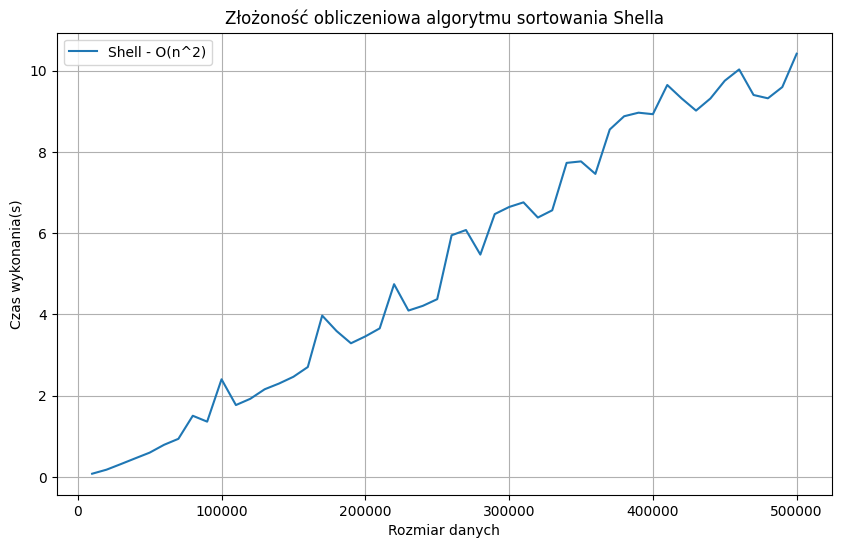

In [55]:
# Plot results
print()
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, times_1, label='Shell - O(n^2)')

plt.title("Złożoność obliczeniowa algorytmu sortowania Shella")
plt.xlabel("Rozmiar danych")
plt.ylabel("Czas wykonania(s)")
plt.legend()
plt.grid(True)
plt.show()

## Analiza ciągu Sergewick'a:

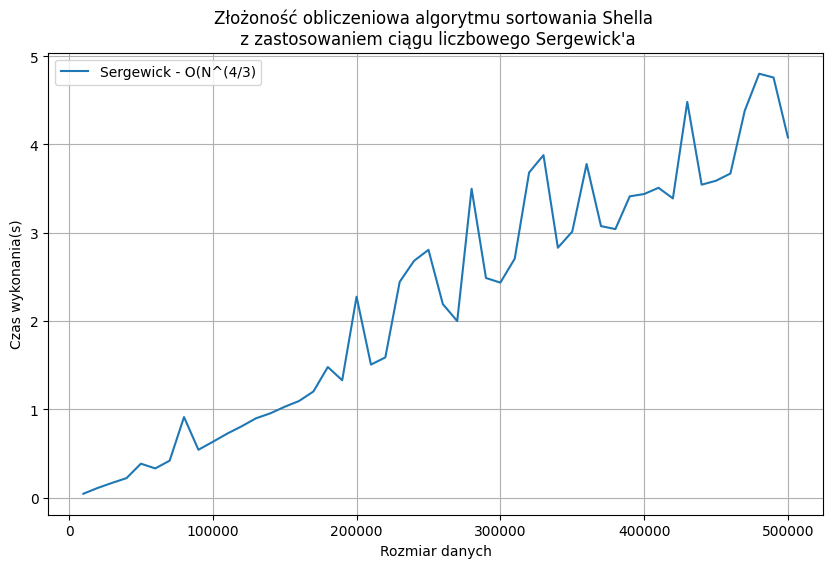

In [56]:
# Plot results
print()
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, times_2, label='Sergewick - O(N^(4/3)')

plt.title("Złożoność obliczeniowa algorytmu sortowania Shella \n z zastosowaniem ciągu liczbowego Sergewick'a")
plt.xlabel("Rozmiar danych")
plt.ylabel("Czas wykonania(s)")
plt.legend()
plt.grid(True)
plt.show()

## Analiza ciągu Papernov-Stashevich

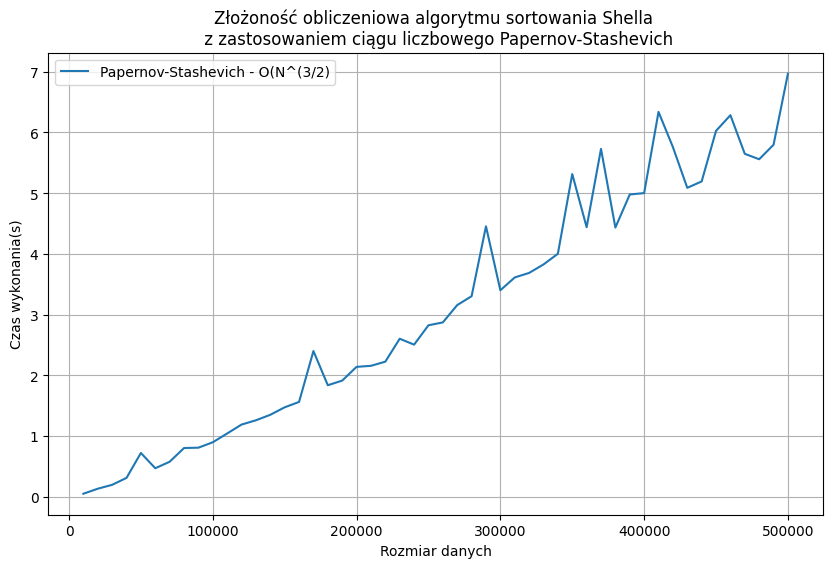

In [57]:
# Plot results
print()
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, times_3, label='Papernov-Stashevich - O(N^(3/2)')

plt.title("Złożoność obliczeniowa algorytmu sortowania Shella \n z zastosowaniem ciągu liczbowego Papernov-Stashevich")
plt.xlabel("Rozmiar danych")
plt.ylabel("Czas wykonania(s)")
plt.legend()
plt.grid(True)
plt.show()

## Analiza ciągu Pratt'a

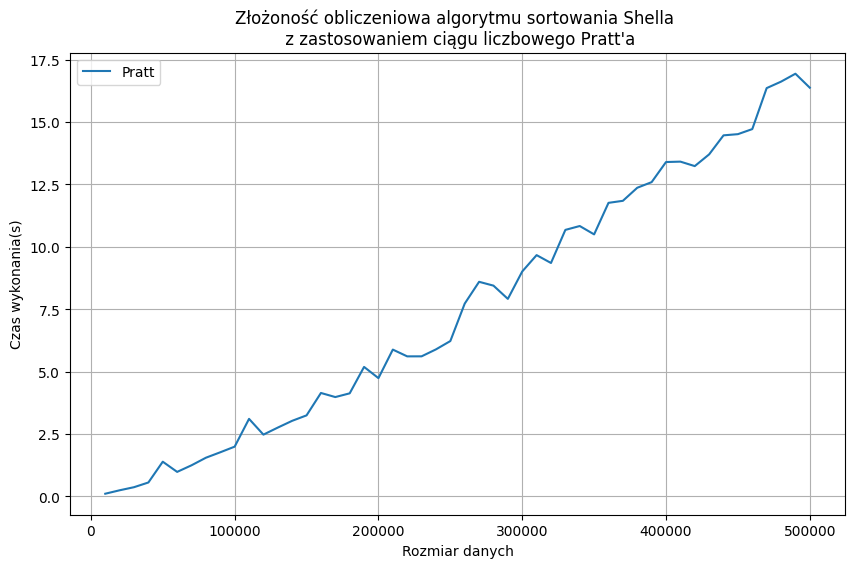

In [58]:
# Plot results
print()
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, times_4, label='Pratt')

plt.title("Złożoność obliczeniowa algorytmu sortowania Shella \n z zastosowaniem ciągu liczbowego Pratt'a")
plt.xlabel("Rozmiar danych")
plt.ylabel("Czas wykonania(s)")
plt.legend()
plt.grid(True)
plt.show()

## Analiza ciągu Ciura

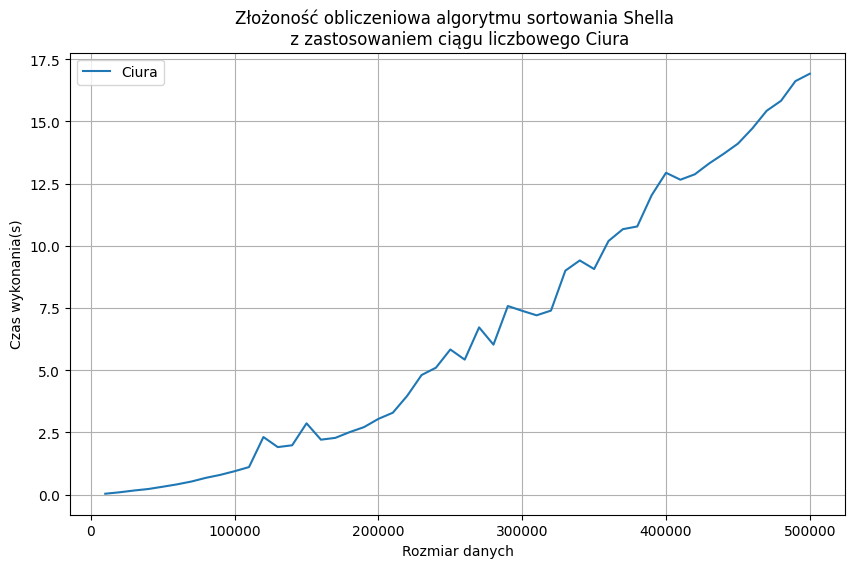

In [59]:
# Plot results
print()
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, times_5, label='Ciura')

plt.title("Złożoność obliczeniowa algorytmu sortowania Shella \n z zastosowaniem ciągu liczbowego Ciura")
plt.xlabel("Rozmiar danych")
plt.ylabel("Czas wykonania(s)")
plt.legend()
plt.grid(True)
plt.show()

## Analiza ciągu Hibbard

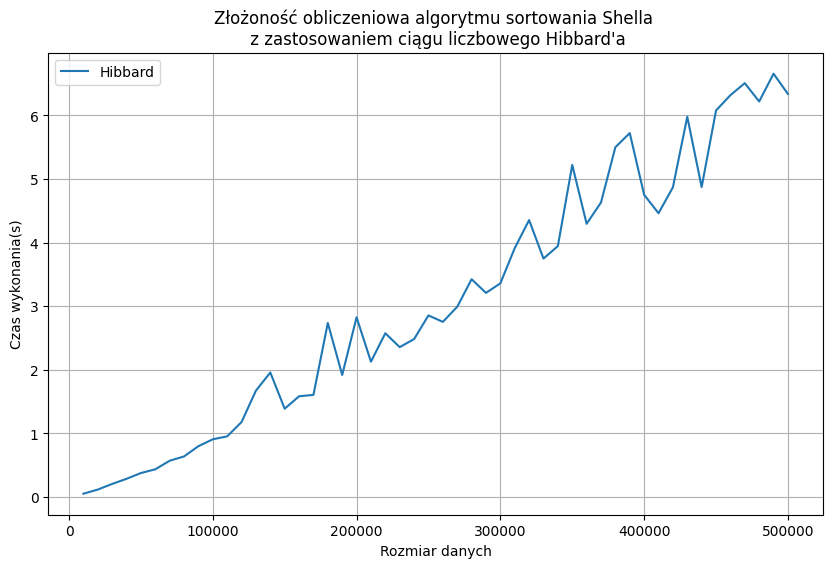

In [60]:
# Plot results
print()
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, times_6, label='Hibbard')

plt.title("Złożoność obliczeniowa algorytmu sortowania Shella \n z zastosowaniem ciągu liczbowego Hibbard'a")
plt.xlabel("Rozmiar danych")
plt.ylabel("Czas wykonania(s)")
plt.legend()
plt.grid(True)
plt.show()

## Analiza zbiorcza

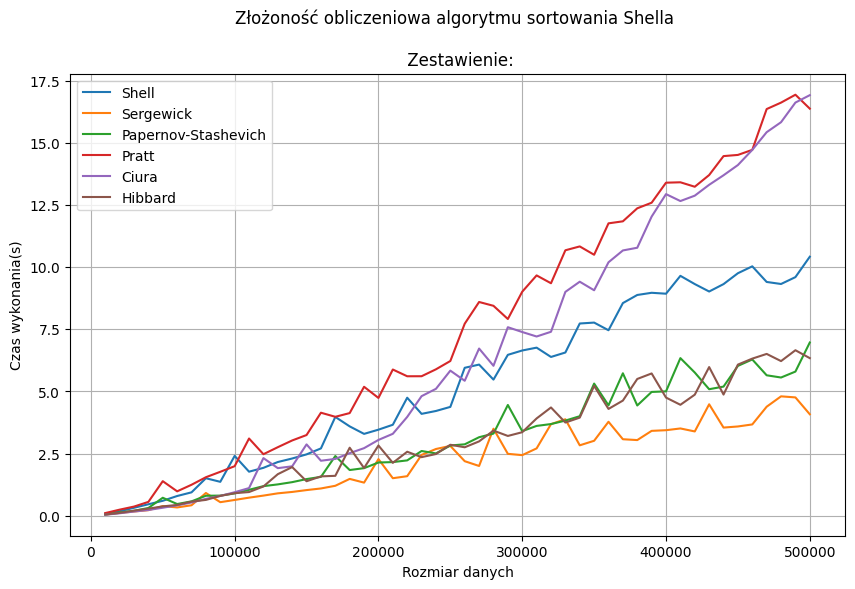

In [61]:
# Plot results
print()
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, times_1, label='Shell')
plt.plot(array_sizes, times_2, label='Sergewick')
plt.plot(array_sizes, times_3, label='Papernov-Stashevich')
plt.plot(array_sizes, times_4, label='Pratt')
plt.plot(array_sizes, times_5, label='Ciura')
plt.plot(array_sizes, times_6, label='Hibbard')
# plt.plot(array_sizes, times_3, label='O(n^(3/2))')

plt.title("Złożoność obliczeniowa algorytmu sortowania Shella \n\n Zestawienie:")
plt.xlabel("Rozmiar danych")
plt.ylabel("Czas wykonania(s)")
plt.legend()
plt.grid(True)
plt.show()

6.	Powtarzanie eksperymentu: Możesz powtórzyć eksperyment kilkakrotnie dla większej wiarygodności wyników, szczególnie jeśli mierzysz czas wykonania, który może być podatny na różnice wynikające z obciążenia systemu itp.

7.	Prezentacja wyników: Przedstaw swoje wyniki w sposób czytelny i przejrzysty. Możesz użyć wykresów, tabel, czy też opisów tekstowych, aby zilustrować, jak różne ciągi przyrostów wpływają na wydajność algorytmu sortowania Shella.